In [1]:
import requests
from bs4 import BeautifulSoup
import json
from IPython.core.display import HTML
import locale
locale.setlocale(locale.LC_ALL, '')
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'}

#call the SEC API endpoint with the Oracle CIK number
response = requests.get("https://data.sec.gov/api/xbrl/companyfacts/CIK0001341439.json", headers=header)

data = None

if response.ok:
    data = json.loads(response.content)
else:
    print(response.status_code)
    print(response.reason)

In [3]:
print(list(data))
print(list(data["facts"]))
print(list(data["facts"]["us-gaap"]))

['cik', 'entityName', 'facts']
['dei', 'us-gaap']
['AccountsPayableCurrent', 'AccountsReceivableNetCurrent', 'AccruedIncomeTaxesCurrent', 'AccruedIncomeTaxesNoncurrent', 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment', 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossDefinedBenefitPensionAndOtherPostretirementPlansNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossNetOfTax', 'AcquiredFiniteLivedIntangibleAssetAmount', 'AdjustmentsNoncashItemsToReconcileNetIncomeLossToCashProvidedByUsedInOperatingActivitiesOther', 'AdjustmentsRelatedToTaxWithholdingForShareBasedCompensation', 'AdjustmentsToAdditionalPaidInCapitalSharebasedCompensationRequisiteServicePeriodRecognitionValue', 'AdjustmentsToAdditio

In [4]:
for concept in data["facts"]["dei"]:
    print(concept)
    print(f'{data["facts"]["dei"][concept]["label"]}: {data["facts"]["dei"][concept]["description"]}')
    print()

EntityCommonStockSharesOutstanding
Entity Common Stock, Shares Outstanding: Indicate number of shares or other units outstanding of each of registrant's classes of capital or common stock or other ownership interests, if and as stated on cover of related periodic report. Where multiple classes or units exist define each class/interest by adding class of stock items such as Common Class A [Member], Common Class B [Member] or Partnership Interest [Member] onto the Instrument [Domain] of the Entity Listings, Instrument.

EntityPublicFloat
Entity Public Float: The aggregate market value of the voting and non-voting common equity held by non-affiliates computed by reference to the price at which the common equity was last sold, or the average bid and asked price of such common equity, as of the last business day of the registrant's most recently completed second fiscal quarter.



In [5]:
for concept in data["facts"]["us-gaap"]:
    print(concept)
    print(f'{data["facts"]["us-gaap"][concept]["label"]}: {data["facts"]["us-gaap"][concept]["description"]}')
    print()

AccountsPayableCurrent
Accounts Payable, Current: Carrying value as of the balance sheet date of liabilities incurred (and for which invoices have typically been received) and payable to vendors for goods and services received that are used in an entity's business. Used to reflect the current portion of the liabilities (due within one year or within the normal operating cycle if longer).

AccountsReceivableNetCurrent
Accounts Receivable, after Allowance for Credit Loss, Current: Amount, after allowance for credit loss, of right to consideration from customer for product sold and service rendered in normal course of business, classified as current.

AccruedIncomeTaxesCurrent
Accrued Income Taxes, Current: Carrying amount as of the balance sheet date of the unpaid sum of the known and estimated amounts payable to satisfy all currently due domestic and foreign income tax obligations.

AccruedIncomeTaxesNoncurrent
Accrued Income Taxes, Noncurrent: Carrying amount as of the balance sheet da

In [6]:
liabilityRows = """
    <tr>
        <th>Report Type</th>
        <th>Report Number</th>
        <th>Filing Date</th>
        <th>Fiscal Year</th>
        <th>Period Ending</th>
        <th>Value</th>
    </tr>"""

for liabilities in data["facts"]["us-gaap"]["LiabilitiesCurrent"]["units"]["USD"]:
    liabilityRows += f"""
        <tr>
            <td>{liabilities["form"]}</td>
            <td>{liabilities["accn"]}</td>
            <td>{liabilities["filed"]}</td>
            <td>{liabilities["fy"]}</td>
            <td>{liabilities["end"]}</td>
            <td>{locale.currency(liabilities["val"], grouping=True)}</td>
        </tr>"""

html = f"<table>{liabilityRows}</table>"
display(HTML(html))


Report Type,Report Number,Filing Date,Fiscal Year,Period Ending,Value
10-Q,0001193125-09-195193,2009-09-21,2010,2009-05-31,"$9,149,000,000.00"
10-Q,0001193125-09-257212,2009-12-22,2010,2009-05-31,"$9,149,000,000.00"
10-Q,0001193125-10-070192,2010-03-29,2010,2009-05-31,"$9,149,000,000.00"
10-K,0001193125-10-151896,2010-07-01,2010,2009-05-31,"$9,149,000,000.00"
10-Q,0001193125-09-195193,2009-09-21,2010,2009-08-31,"$9,160,000,000.00"
10-Q,0001193125-09-257212,2009-12-22,2010,2009-11-30,"$8,534,000,000.00"
10-Q,0001193125-10-070192,2010-03-29,2010,2010-02-28,"$14,251,000,000.00"
10-K,0001193125-10-151896,2010-07-01,2010,2010-05-31,"$14,691,000,000.00"
10-Q/A,0001193125-10-219697,2010-09-29,2011,2010-05-31,"$14,691,000,000.00"
10-Q,0001193125-10-285703,2010-12-21,2011,2010-05-31,"$14,691,000,000.00"


In [7]:
currentLiabilityReports = {}

for liabilities in data["facts"]["us-gaap"]["LiabilitiesCurrent"]["units"]["USD"]:
    currentLiabilityReports[liabilities["end"]] = liabilities
    
print(currentLiabilityReports)

{'2009-05-31': {'end': '2009-05-31', 'val': 9149000000, 'accn': '0001193125-10-151896', 'fy': 2010, 'fp': 'FY', 'form': '10-K', 'filed': '2010-07-01', 'frame': 'CY2009Q2I'}, '2009-08-31': {'end': '2009-08-31', 'val': 9160000000, 'accn': '0001193125-09-195193', 'fy': 2010, 'fp': 'Q1', 'form': '10-Q', 'filed': '2009-09-21', 'frame': 'CY2009Q3I'}, '2009-11-30': {'end': '2009-11-30', 'val': 8534000000, 'accn': '0001193125-09-257212', 'fy': 2010, 'fp': 'Q2', 'form': '10-Q', 'filed': '2009-12-22', 'frame': 'CY2009Q4I'}, '2010-02-28': {'end': '2010-02-28', 'val': 14251000000, 'accn': '0001193125-10-070192', 'fy': 2010, 'fp': 'Q3', 'form': '10-Q', 'filed': '2010-03-29', 'frame': 'CY2010Q1I'}, '2010-05-31': {'end': '2010-05-31', 'val': 14691000000, 'accn': '0001193125-11-174819', 'fy': 2011, 'fp': 'FY', 'form': '10-K', 'filed': '2011-06-28', 'frame': 'CY2010Q2I'}, '2010-08-31': {'end': '2010-08-31', 'val': 13800000000, 'accn': '0001193125-10-219697', 'fy': 2011, 'fp': 'Q1', 'form': '10-Q/A', 'f

In [8]:
liabilityRows = """
    <tr>
        <th>Report Type</th>
        <th>Report Number</th>
        <th>Filing Date</th>
        <th>Fiscal Year</th>
        <th>Fiscal Period</th>
        <th>Period Ending</th>
        <th>Value</th>
    </tr>"""

for liabilities in currentLiabilityReports:
    liabilityRows += f"""
        <tr>
            <td>{currentLiabilityReports[liabilities]["form"]}</td>
            <td>{currentLiabilityReports[liabilities]["accn"]}</td>
            <td>{currentLiabilityReports[liabilities]["filed"]}</td>
            <td>{currentLiabilityReports[liabilities]["fy"]}</td>
            <td>{currentLiabilityReports[liabilities]["fp"]}</td>
            <td>{currentLiabilityReports[liabilities]["end"]}</td>
            <td>{locale.currency(currentLiabilityReports[liabilities]["val"], grouping=True)}</td>
        </tr>"""

html = f"<table>{liabilityRows}</table>"
display(HTML(html))

Report Type,Report Number,Filing Date,Fiscal Year,Fiscal Period,Period Ending,Value
10-K,0001193125-10-151896,2010-07-01,2010,FY,2009-05-31,"$9,149,000,000.00"
10-Q,0001193125-09-195193,2009-09-21,2010,Q1,2009-08-31,"$9,160,000,000.00"
10-Q,0001193125-09-257212,2009-12-22,2010,Q2,2009-11-30,"$8,534,000,000.00"
10-Q,0001193125-10-070192,2010-03-29,2010,Q3,2010-02-28,"$14,251,000,000.00"
10-K,0001193125-11-174819,2011-06-28,2011,FY,2010-05-31,"$14,691,000,000.00"
10-Q/A,0001193125-10-219697,2010-09-29,2011,Q1,2010-08-31,"$13,800,000,000.00"
10-Q,0001193125-10-285703,2010-12-21,2011,Q2,2010-11-30,"$13,336,000,000.00"
10-Q,0001193125-11-081178,2011-03-29,2011,Q3,2011-02-28,"$11,282,000,000.00"
10-K,0001193125-12-284007,2012-06-26,2012,FY,2011-05-31,"$14,192,000,000.00"
10-Q,0001193125-11-255436,2011-09-23,2012,Q1,2011-08-31,"$13,056,000,000.00"


In [9]:
liabilitiesDF = pd.DataFrame(columns=["PeriodEnding","FiscalYear","FiscalPeriod","Type","CurrentLiabilities"])

for liability in currentLiabilityReports.values():    
    #liabilitiesDF = liabilitiesDF.append({"PeriodEnding":liability["end"],"FiscalYear":liability["fy"],"FiscalPeriod":liability["fp"],"Type":liability["form"],"CurrentLiabilities":liability["val"]}, ignore_index=True)
    #the above method was be removed from pandas. Instead, use the two lines of code below 
    #the pd.Series creates a series that will act as a new row in the data frame
    #the concat method adds the new series row to the data frame. First the series needs to be converted to a frame and transposed (i.e., series.to_frame().T).
    
    series = pd.Series({"PeriodEnding":liability["end"],"FiscalYear":liability["fy"],"FiscalPeriod":liability["fp"],"Type":liability["form"],"CurrentLiabilities":liability["val"]})
    liabilitiesDF = pd.concat([liabilitiesDF, series.to_frame().T])
    

liabilitiesDF.set_index("PeriodEnding", inplace=True)
liabilitiesDF.head(10)

,FiscalYear,FiscalPeriod,Type,CurrentLiabilities
PeriodEnding,,,,
2009-05-31,2010,FY,10-K,9149000000
2009-08-31,2010,Q1,10-Q,9160000000
2009-11-30,2010,Q2,10-Q,8534000000
2010-02-28,2010,Q3,10-Q,14251000000
2010-05-31,2011,FY,10-K,14691000000
2010-08-31,2011,Q1,10-Q/A,13800000000
2010-11-30,2011,Q2,10-Q,13336000000
2011-02-28,2011,Q3,10-Q,11282000000
2011-05-31,2012,FY,10-K,14192000000


<Axes: xlabel='PeriodEnding'>

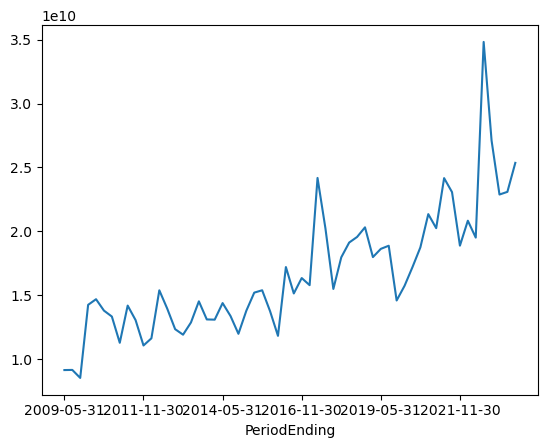

In [10]:
liabilitiesDF.CurrentLiabilities.plot()

<Axes: xlabel='PeriodEnding'>

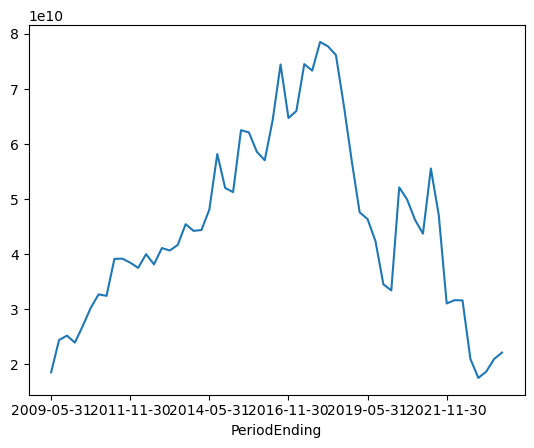

In [11]:
currentAssetsReports = {}

for assets in data["facts"]["us-gaap"]["AssetsCurrent"]["units"]["USD"]:
    currentAssetsReports[assets["end"]] = assets

assetsDF = pd.DataFrame(columns=["PeriodEnding","FiscalYear","FiscalPeriod","Type","CurrentAssets"])

for asset in currentAssetsReports.values():
    #assetsDF = assetsDF.append({"PeriodEnding":asset["end"],"FiscalYear":asset["fy"],"FiscalPeriod":asset["fp"],"Type":asset["form"],"CurrentAssets":asset["val"]}, ignore_index=True)
    series = pd.Series({"PeriodEnding":asset["end"],"FiscalYear":asset["fy"],"FiscalPeriod":asset["fp"],"Type":asset["form"],"CurrentAssets":asset["val"]})
    assetsDF = pd.concat([assetsDF, series.to_frame().T])

assetsDF.set_index("PeriodEnding", inplace=True)

assetsDF.CurrentAssets.plot()

In [12]:
df = pd.merge(liabilitiesDF, assetsDF, on="PeriodEnding", suffixes=('', '_y'))
df = df.drop(columns=["FiscalYear_y","FiscalPeriod_y","Type_y"])
df["WorkingCapital"] = df["CurrentAssets"] - df["CurrentLiabilities"]
df["CurrentRatio"] = df["CurrentAssets"] / df["CurrentLiabilities"]
df.head()

,FiscalYear,FiscalPeriod,Type,CurrentLiabilities,CurrentAssets,WorkingCapital,CurrentRatio
PeriodEnding,,,,,,,
2009-05-31,2010,FY,10-K,9149000000,18581000000,9432000000,2.030932
2009-08-31,2010,Q1,10-Q,9160000000,24445000000,15285000000,2.668668
2009-11-30,2010,Q2,10-Q,8534000000,25235000000,16701000000,2.956996
2010-02-28,2010,Q3,10-Q,14251000000,23979000000,9728000000,1.682619
2010-05-31,2011,FY,10-K,14691000000,27004000000,12313000000,1.838132


<Axes: xlabel='PeriodEnding'>

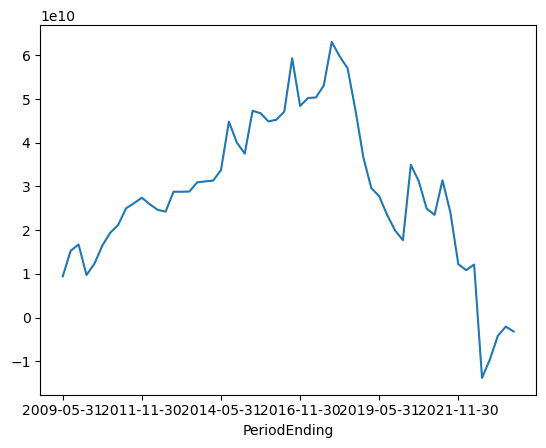

In [13]:
df.WorkingCapital.plot()

<Axes: xlabel='PeriodEnding'>

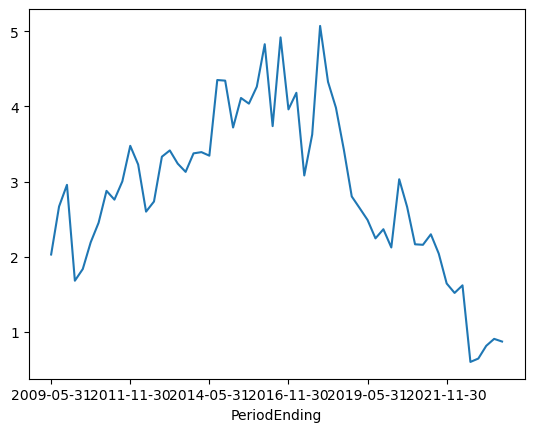

In [14]:
df.CurrentRatio.plot()

In [15]:
df = pd.get_dummies(df, columns=["FiscalPeriod","Type"], prefix=["FiscalPeriod_","Type_"])
df.head()

,FiscalYear,CurrentLiabilities,CurrentAssets,WorkingCapital,CurrentRatio,FiscalPeriod__FY,FiscalPeriod__Q1,FiscalPeriod__Q2,FiscalPeriod__Q3,Type__10-K,Type__10-Q,Type__10-Q/A
PeriodEnding,,,,,,,,,,,,
2009-05-31,2010,9149000000,18581000000,9432000000,2.030932,True,False,False,False,True,False,False
2009-08-31,2010,9160000000,24445000000,15285000000,2.668668,False,True,False,False,False,True,False
2009-11-30,2010,8534000000,25235000000,16701000000,2.956996,False,False,True,False,False,True,False
2010-02-28,2010,14251000000,23979000000,9728000000,1.682619,False,False,False,True,False,True,False
2010-05-31,2011,14691000000,27004000000,12313000000,1.838132,True,False,False,False,True,False,False


In [16]:
response = requests.get("https://www.sec.gov/Archives/edgar/data/1341439/000156459022023675/orcl-10k_20220531.htm", headers=header)

In [17]:
textData = []
text = ""

if response.ok:
    parser = BeautifulSoup(response.content, 'html.parser')
    textData = parser.find_all('p')
    
    for data in textData:
        text += " " + data.text
        #print(data.text)
else:
    print(response.status_code)
    print(response.reason)

In [18]:
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
matrix = vectorizer.fit_transform([text])
#columns = vectorizer.get_feature_names() older version
columns = vectorizer.get_feature_names_out()

textDF = pd.DataFrame(matrix.toarray(), columns=columns)
textDF.head()

,00,000,001,01,04,063,07,08,10,100,...,website,weighted,work,workforce,working,workloads,world,worldwide,year,years
0,8,61,27,14,8,7,7,8,125,10,...,9,27,16,16,12,14,9,14,85,65
